In [1]:
import arcgis, json, os, shutil
from datetime import datetime
from arcgis import GIS

### Connect to AGOL, get item

In [2]:
gis = GIS('Pro')

<Item title:"Network Planning V4" type:Web Map owner:mechomicky@burnsmcd.com_bmcd_gis>
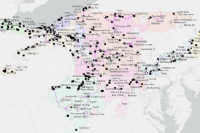

In [4]:
item = gis.content.get('f55af3418a31450cbd8af45da150fe4f') # Enter item id of the map or app here
item

### Get item data

In [5]:
data = item.get_data()
jsonData = json.dumps(data, indent=4)
jsonData

'{\n    "operationalLayers": [\n        {\n            "id": "wms_8085",\n            "url": "https://api.nearmap.com/wms/v1/latest/apikey/MTRhOWYzYzAtYTkzNS00MjNjLThmMzAtZjg2NTg0NmZlOTli",\n            "visibility": false,\n            "visibleLayers": [\n                "Nearmap/Nearmap/USA"\n            ],\n            "opacity": 1,\n            "title": "Nearmap Imagery",\n            "version": "1.1.1",\n            "mapUrl": "https://api.nearmap.com/wms/v1/latest/apikey/MTRhOWYzYzAtYTkzNS00MjNjLThmMzAtZjg2NTg0NmZlOTli",\n            "layers": [\n                {\n                    "name": "Nearmap/Nearmap/USA",\n                    "title": "Nearmap Imagery"\n                }\n            ],\n            "spatialReferences": [\n                3857\n            ],\n            "extent": [\n                [\n                    -180,\n                    -90\n                ],\n                [\n                    180,\n                    90\n                ]\n          

### Write item JSON to file, including backup

In [6]:
jsonFolder = r'C:\Users\mechomicky\OneDrive - Burns & McDonnell\Documents\Code\JSON' # Enter path to save the json file. Path must have an "Archive" subfolder
os.chdir(jsonFolder)
file = item.title + '.json' 
backup = item.title + '_backup.json'
with open(file, 'w') as outfile:
    outfile.write(jsonData)
# If there's already a backup file, move the previous backup to archive before creating a new one
if os.path.exists(backup):
    now = datetime.now()
    now = now.strftime('_%m_%d_%y__%H%M')
    shutil.move(backup, f'{jsonFolder}\\Archive\\{item.title}{now}.json')
with open(backup, 'w') as outfile:
    outfile.write(jsonData)

# Perform any edits to the file before continuing

### The below test should return a 'dict' data type. If it prints another data type, like 'str', then your JSON is invalid and will break your item if the update is made. A safer option is to validate the json with a service such as jsonlint.com before continuing.

In [11]:
updateTest = json.loads(open(file, 'r').read())
print(type(updateTest))
updateTest

<class 'dict'>


{'operationalLayers': [{'id': 'FAN_Prop_Studies_Legend_4814', 'layerType': 'ArcGISFeatureLayer', 'url': 'https://services1.arcgis.com/da97pfnD5ytr77Y4/arcgis/rest/services/FAN_Prop_Studies_Legend/FeatureServer/0', 'visibility': True, 'opacity': 0.82, 'title': 'FAN Prop Studies Legend', 'itemId': '52a21f089faa4acc9aead6f702e350ed', 'layerDefinition': {'minScale': 0, 'maxScale': 0, 'geometryType': 'esriGeometryPolygon', 'objectIdField': 'OBJECTID', 'drawingInfo': {'renderer': {'type': 'uniqueValue', 'field1': 'Level', 'fieldDelimiter': ',', 'uniqueValueInfos': [{'symbol': {'color': [0, 255, 255, 255], 'outline': {'color': [153, 153, 153, 64], 'width': 0, 'type': 'esriSLS', 'style': 'esriSLSNull'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}, 'value': '-85 dBm', 'label': '-85 dBm'}, {'symbol': {'color': [0, 193, 192, 255], 'outline': {'color': [153, 153, 153, 64], 'width': 0.75, 'type': 'esriSLS', 'style': 'esriSLSSolid'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}, 'value': '-80 dBm', '

### Update the item (will return True if the update is successful)

In [12]:
updated = json.loads(open(file, 'r').read())
result = item.update(item_properties={"text":updated})
result

True